The goal of this notebook is to examine the theoretical predictions (a la the relaxation method) for the surface waves internal wave interactions. 

Specifically, in the overleaf we show that this reduces to solving: 
$$
    \mu \delta N = k\frac{\partial \delta U}{\partial x} \frac{\partial N_0}{\partial k}.
$$
In the original formulation of Alpers (1985), $\mu^{-1}=\tau$ was taken to be a constant. If you look into Nicolas's recent work, you can see they use it as a general parameter. Dangerous! 

I'll start by assuming it's constant, and then we can see if we need to do something fancier. 

In [58]:
cd /Users/npizzo/Documents/GitHub/IW
imatlab_export_fig('print-png') 
load('nick.mat')
load('nick2.mat')
load('Pizzo_background.mat');
load('ForNick2.mat');

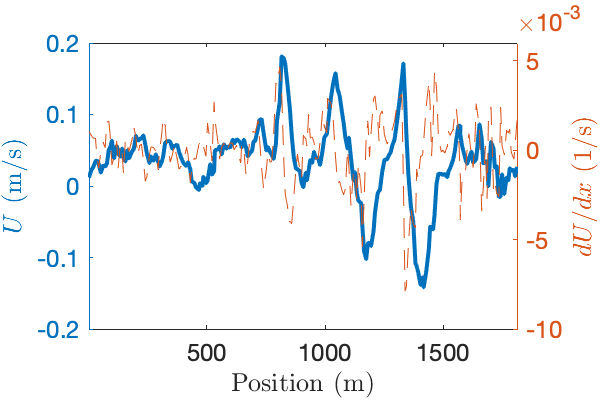

In [59]:
%% Look at currents. 
lonref = -120.78;
latref =  34.902;
[x,y]=lonlat2m(Longitude,34.902*ones(length(Longitude)),lonref,latref);
g = 9.81;
clf
% subplot(2,1,1)
yyaxis left
plot(x, U, 'linewidth',2)
dudx = gradient(U)./gradient(x);

yyaxis right
plot(x, dudx, '--')
set(gca, 'fontsize',12)
yyaxis left
set(gca, 'fontsize', 12)
ylabel('$U$ (m/s)', 'interpreter', 'latex')
xlim([ min(x) max(x)])
yyaxis right
xlabel('Position (m)', 'interpreter', 'latex')
ylabel('$dU/dx$ (1/s)', 'interpreter', 'latex')
set(gcf, 'Position',  [100, 100, 300, 200])
set(gcf, 'color', 'w');

KX = background.KX;
KY = background.KY;
Spec = background.Eoka2;
% redefine KX,KY,Spec to only include positive kx branch. 
KX2 = KX(:,512:end);
KY2 = KY(:,512:end);
Ly = length(KX2(:,1));
Lx = length(KX2(1,:));
Spec2 = Spec(:,512:end);

In [60]:
%% Next, compute the background action, and its gradient 
% with respect to k
dNodk=zeros(Ly,Lx);
No=Spec2./sqrt(g*sqrt(KY2.^2+KX2.^2));
for i=1:Ly
    dNodk(i,:)=gradient(No(i,:))./gradient(KX2(1,:));
end

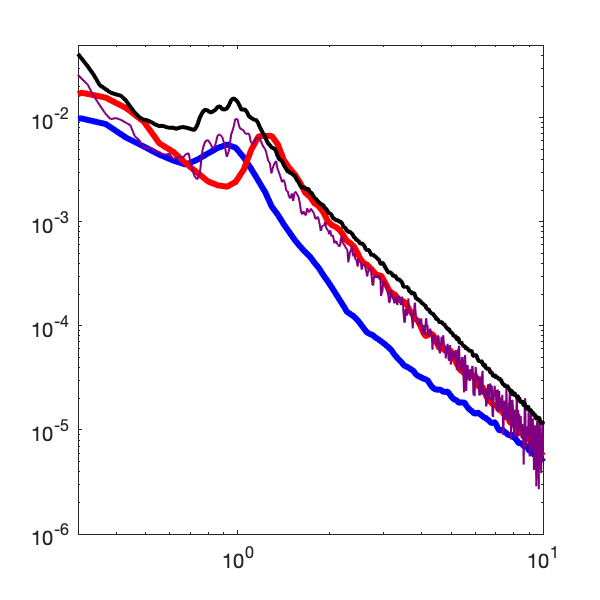

In [98]:
%% we need to do this for each band. 
deltaN = zeros(Ly,Lx,6);
N = deltaN;
S = deltaN;
% tau = 50;
% tau*SUB{j}.dUdx.*
for j = 1:6
for i = 1:Ly
    deltaN(i,:,j) =  -0.1*KX2(i,:).^1.*dNodk(i,:);
end
end
for i = 1:6
N(:,:,i) = No + deltaN(:,:,i);
S(:,:,i) = N(:,:,i).*(sqrt(g*sqrt(KY2.^2+KX2.^2)));
end
% omnidirectional spectra
% background spectra
[XFFT_rt, theta, r, xZ, yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:), background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
%
theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1:6
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end

%% look at this on one plot
clf
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1),2*theory_omni(:,1),...
    'color',[1/2 1/2 1/2],'linewidth',1);
hold on
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*theory_omni(:,6),...
    'color',[1/2 0 1/2],'linewidth',1);
loglog(background_omnidir_k,2 * background_omnidir_PHI ,...
    'k','linewidth',2);
xlim([3e-1 1e1])
ylim([1e-6 5e-2])
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 300, 300])

Now do this for a variety of different values of $tau * du/dx$

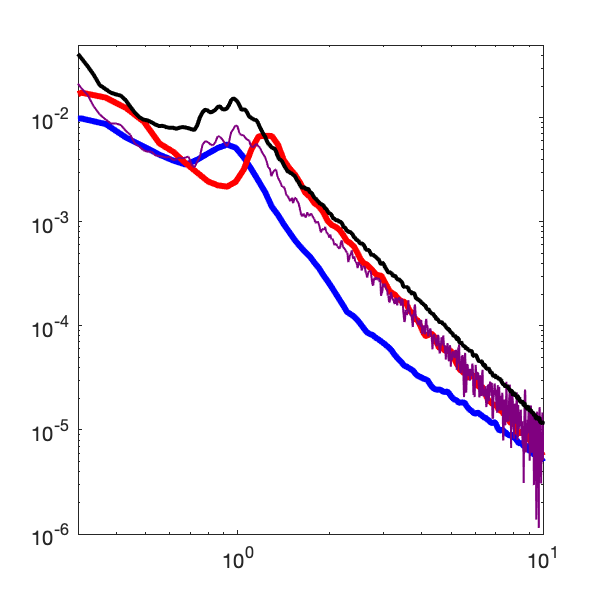

In [97]:
%% we need to do this for each band. 
deltaN = zeros(Ly,Lx,6);
N = deltaN;
S = deltaN;
% tau = 50;
% tau*SUB{j}.dUdx.*
for j = 1:6
for i = 1:Ly
    deltaN(i,:,j) =  -0.05*KX2(i,:).^(1.5).*dNodk(i,:);
end
end
for i = 1:6
N(:,:,i) = No + deltaN(:,:,i);
S(:,:,i) = N(:,:,i).*(sqrt(g*sqrt(KY2.^2+KX2.^2)));
end
% omnidirectional spectra
% background spectra
[XFFT_rt, theta, r, xZ, yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:), background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
%
theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1:6
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end

%% look at this on one plot
clf
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1),2*theory_omni(:,1),...
    'color',[1/2 1/2 1/2],'linewidth',1);
hold on
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*theory_omni(:,6),...
    'color',[1/2 0 1/2],'linewidth',1);
loglog(background_omnidir_k,2 * background_omnidir_PHI ,...
    'k','linewidth',2);
xlim([3e-1 1e1])
ylim([1e-6 5e-2])
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 300, 300])

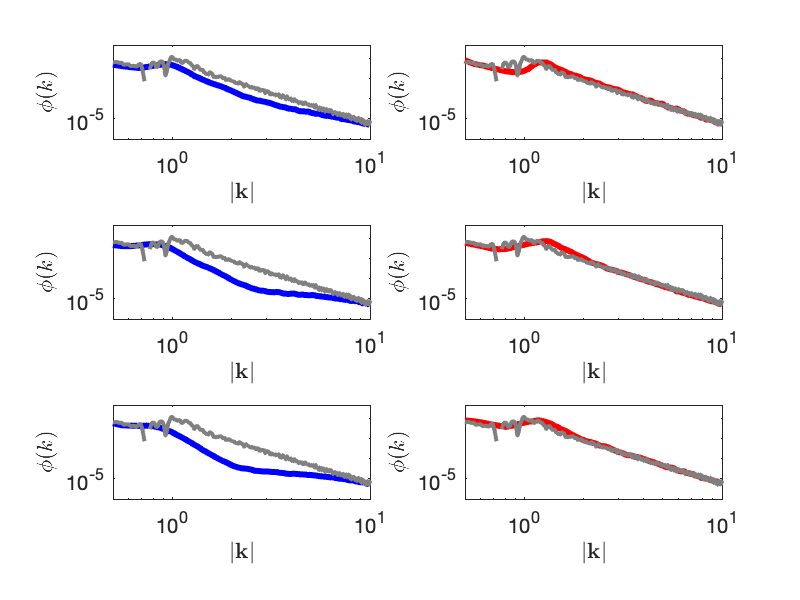

In [66]:
% look at all the bands
clf
subplot(3,2,5)
loglog(SUB{1}.omnidir_k ,...
    SUB{1}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1), 2*theory_omni(:,1) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,3)
loglog(SUB{2}.omnidir_k ,...
    SUB{2}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,2),2*theory_omni(:,2) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,1)
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,3),2*theory_omni(:,3) ,...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,6)
loglog(SUB{4}.omnidir_k ,...
    SUB{4}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,4),2*theory_omni(:,4),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,4)
loglog(SUB{5}.omnidir_k ,...
    SUB{5}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,5),2*theory_omni(:,5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,2)
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*theory_omni(:,6),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 400, 300])


Here, the blue curves are the smooth bands, and increase in distance to the west as we move down rows. The red curves are the rough bands. We can see that there are varying degrees of success here for different locations along the bands. The grey curves are the theory. 

Note, here $\tau = 100 s$, a constant. 

We now try to do this again, when $\tau$ is taken to be a function of $(k,l)$.

Here, we've taken $$\tau = \tau_0 k^\gamma$$,
for constants $\tau$ and $\gamma$. 


In [47]:
%% Redoc computation for tau a function of k
deltaN = zeros(Ly,Lx,6);N=deltaN;S=deltaN;
tau = 100;
for j = 1:6
for i = 1:Ly
    deltaN(i,:,j) = tau*KX2(i,:).^(0).*SUB{j}.dUdx.*1.*dNodk(i,:);
end
end

for i = 1:6
N(:,:,i) = No + deltaN(:,:,i);
S(:,:,i) = N(:,:,i).*sqrt(g*sqrt(KY2.^2+KX2.^2));
end
% omnidirectional spectra
% background spectra
[XFFT_rt, theta, r, xZ, yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:), background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
%
theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1:6
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end

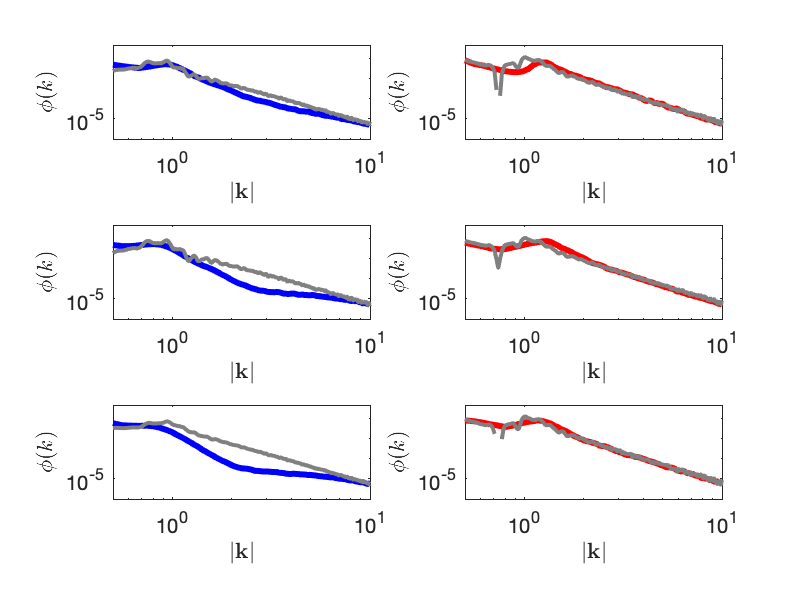

In [46]:
% look at all the bands
clf
subplot(3,2,5)
loglog(SUB{1}.omnidir_k ,...
    SUB{1}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(theory_k(:,1), 2*smooth(theory_omni(:,1),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,3)
loglog(SUB{2}.omnidir_k ,...
    SUB{2}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,2),2*smooth(theory_omni(:,2),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,1)
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3 )
hold on
loglog(theory_k(:,3),2*smooth(theory_omni(:,3),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,6)
loglog(SUB{4}.omnidir_k ,...
    SUB{4}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,4),2*smooth(theory_omni(:,4),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,4)
loglog(SUB{5}.omnidir_k ,...
    SUB{5}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,5),2*smooth(theory_omni(:,5),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
subplot(3,2,2)
loglog(SUB{6}.omnidir_k ,...
    SUB{6}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(theory_k(:,6),2*smooth(theory_omni(:,6),5),...
    'color',[1/2 1/2 1/2],'linewidth',2);
xlim([5e-1 1e1])
ylim([1e-6 5e-2])
xlabel('$|\bf{k}|$','interpreter','latex')
ylabel('$\phi(k)$','interpreter','latex')
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 400, 300])


So, we can see that this does marginally better in some areas, but I'm not sure it's worth the extra degrees of freedom. 

In [ ]:
%% contour plot this
clf
subplot(2,1,1)
contourf(KX2,KY2,log10(abs(Spec2)),10)
xlim([0 5])
ylim([-5 5])
caxis([-8 -3])
colorbar
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
set(gca,'fontsize',22)
subplot(2,1,2)
contourf(KX2,KY2,log10(abs(S(:,:,1))),10)
xlim([0 5])
ylim([-5 5])
caxis([-8 -3])
colorbar
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
set(gca,'fontsize',22)

This doesn't seem to be working particularly well. Note, if $\mu =\nu^{-1}k$, then we can solve the system without taking the perturbation approach of Alpers, to find 
$$N=N_0e^{\nu \frac{\partial U}{\partial x} k}.$$
Does this do any better? 

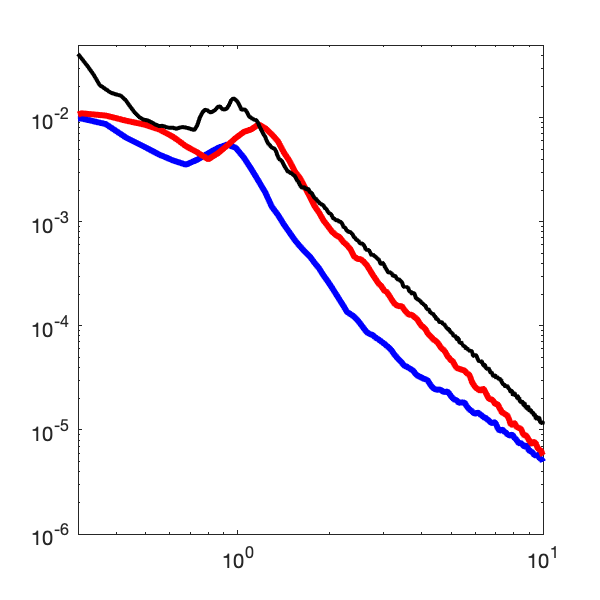

In [57]:
for i = 1
N(:,:,i) = 2*No.*exp(KX2)./KX2;
S(:,:,i) = N(:,:,i).*sqrt(g * sqrt(KY2.^2 + KX2.^2));
end

theory_omni = zeros(1021,6); 
theory_k = theory_omni;
for j = 1
    
 [XFFT_rt, theta, r, xZ, yZ] = xy2rt(S(:,:,j), KX2(1,:), KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i = 1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    theory_omni(:,j) = nansum(omnidir_fft_t);
    theory_k(:,j)  = r;   
end
% look at this all on one plot
clf
loglog(SUB{3}.omnidir_k ,...
    SUB{3}.omnidir_PHI,'b','linewidth',3)
    hold on
    loglog(SUB{4}.omnidir_k ,...
    SUB{4}.omnidir_PHI,'r','linewidth',3)
hold on
loglog(theory_k(:,1),2*theory_omni(:,1),...
    'color',[1/2 1/2 1/2],'linewidth',1);
loglog(background_omnidir_k,2*background_omnidir_PHI,...
    'k','linewidth',2);
xlim([3e-1 1e1])
ylim([1e-6 5e-2])
set(gcf, 'color', 'w');
set(gcf, 'Position',  [0, 0, 300, 300])

In [ ]:
% Can we explain the 2d spectra from Luc's observations using WKB?
% NP June 2020 
% load data
cd /Users/npizzo/Documents/Research/IW_SR_mod/
load('nick.mat')
load('nick2.mat')
load('Pizzo_BANDS_1_6.mat');
load('Pizzo_background.mat');
%
x=Longitude*111319.5; 
clf
% subplot(2,1,1)
set(gca,'fontsize',20)
xlabel('Longitude','interpreter','latex')
xlim([ min(x) max(x)])
plot(Longitude,U,'--')
dudx=gradient(U)./gradient(x);
set(gca,'fontsize',20)
xlabel('Longitude','interpreter','latex')
ylabel('$U$ (m/s)','interpreter','latex')

KX=background.KX;
KY=background.KY;
Spec=background.Eoka2;
% redefine KX,KY,Spec to only include positive kx branch. 
KX2=KX(:,512:end);
KY2=KY(:,512:end);
Ly=length(KX2(:,1));
Lx=length(KX2(1,:));
Spec2=zeros(Ly,Lx);
% minimal example to reproduce amplification of high wavenumbers
% for i=1:Ly
%     for j=1:Lx
%         Spec2(i,j)=0.01*KX2(i,j).*exp(-0.5*KX2(i,j).^3);
%     end
% end
Spec2=Spec(:,512:end);
%% find new wavenumbers using WKB 
% Parameters
g=9.81; % acc due to gravity
U1=0.0; % Current speed far downstream
Uo=0.25; % mean speed of current 
c=0.4; % phase speed
k=zeros(Ly,Lx); % pre allocate
th_0=k; % pre allocate
th_2=th_0; % pre allocate
% loop to find updated angle
for i=[Lx+1:Ly]
    for j=1:Lx
k(i,j)=sqrt(KX2(i,j).^2+KY2(i,j).^2);
th_0(i,j)=atan(KY2(i,j)/KX2(i,j));
y4=(sqrt(g*k(i,j))-k(i,j)*(c-U1)*...
    cos(th_0(i,j))).^2+k(i,j)^2*...
    sin(th_0(i,j)).^2*(c-Uo)^2;
y3=-2*sqrt(g*k(i,j)*sin(th_0(i,j)))*...
    (sqrt(g*k(i,j))-k(i,j)*(c-U1)*cos(th_0(i,j)));
y2=g*k(i,j)*sin(th_0(i,j));
y1=0;
y0=-k(i,j)^2*sin(th_0(i,j)).^2*(c-Uo)^2;
p=[y4 y3 y2 y1 y0];
p(isnan(p))=0;
f=roots(p); 
fun=@(theta)(Uo-c)*k(i,j)*sin(th_0(i,j))*cos(theta)...
    +(k(i,j)*c*cos(th_0(i,j))-sqrt(g*k(i,j)))*sin(theta)+...
    +sqrt(g*k(i,j)*sin(theta)*sin(th_0(i,j)));
x0=sin(th_0(i,j));
th_2(i,j)=fzero(fun, x0); % try this again using fzero
% th_2(i,j)=asin((f(1)).^2);
% th_2(i,j)=asin((f(2)).^2); % keep this branch
% th_2tc(i,j)=asin((roots(3)).^2);
% th_2td(i,j)=asin((roots(4)).^2);
    end 
end
% th_2a(imag(th_2a)~=0) = nan;
th_2(imag(th_2)~=0) = nan; % get rid of any angles that have an imag comp
%% build new kx, ky matrices. 
kx=zeros(Ly,Lx);
ky=kx;
for i=[Lx+1:Ly] 
    for j=1:Lx
    kx(i,j)=k(i,j)*sin(th_0(i,j))/sin(th_2(i,j))*cos(th_2(i,j));
    ky(i,j)=k(i,j)*sin(th_0(i,j))/sin(th_2(i,j))*sin(th_2(i,j));
    end
end
% angles are symmetric 
for i=1:Lx-1
    ky(Lx-i,:) = -ky(i+Lx,:);
    kx(Lx-i,:) = kx(i+Lx,:); 
end
% take care of the mode when theta = 0
kx(Lx,:)=((sqrt(g)-sqrt(g-4*(c-Uo).*(sqrt(g*KX2(Lx,:))-...
    (c-U1)*KX2(Lx,:))))./(-2*(c-Uo))).^2;
kx(imag(kx)~=0) = nan;
ky(imag(ky)~=0) = nan;
% filter 
%
% [row, col] = find(isnan(ky));
%% compare new and old grids
clf
subplot(2,1,1)
% plot(KX2,KY2,'k.','markersize',1)
mesh(KX2,KY2, sqrt(KX2.^2+KY2.^2))
xlim([0 15])
ylim([-15 15])
set(gca,'fontsize',18)
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
view(0,90)
subplot(2,1,2)
% clf
% plot(kx,ky,'k.','markersize',1)
mesh(kx,ky,sqrt(KX(:,1:512).^2+KY(:,1:512).^2))
% hold on
% plot(kx(Lx,:),sqrt(kx(Lx,:)),'.r')
xlim([0 15])
ylim([-15 15])
view(0,90)
set(gca,'fontsize',18)
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
%% find updated energy density using conservation of action [this one has 
% viscosity, the one below does not]
S_mod=zeros(Ly,Lx);
S_mod2=S_mod; r2=S_mod; 
ii=0;
for j=1:Lx
   for i=Lx+1:Ly
        th2=abs(th_2(i,j));
  r1=sin(th_0(i,j))/sin(th2);
    r1(isnan(r1))=0;
    r2(i,j)=r1; 
mod=cos(th_0(i,j)).*sqrt(r1).*...
            (0.5*sqrt(g/k(i,j))*cos(th_0(i,j))+U1-c)./...
            ((Uo-c+0.5*sqrt(g/k(i,j)/r1).*...
            cos(th2))*cos(th2))*exp(-0.0*k(i,j)^3);     
     if kx(i,j)<10
         ll=1;
     else
         ll=0;
     end
        S_mod(i,j)=ll*Spec2(i,j)*mod;
        S_mod(Ly+1-i,j)=ll*Spec2(Ly+1-i,j)*mod;
        % look at just the amplification predicted by WKB, i.e. Ef/Eo
        S_mod2(i,j)=mod;
        S_mod2(Ly+1-i,j)=mod;
    end
end
% we finally need to set up S_mod when ky=0
for i=1:Lx
     if kx(Lx,i)<10
         ll=1;
     else
         ll=0;
     end
mod=(U1-c+0.5*sqrt(g./KX2(Lx,i))).*...
    sqrt(g./KX2(Lx,i))./(sqrt(g./kx(Lx,i)).*(Uo-c+0.5*sqrt(g./kx(Lx,i))))...
    *exp(-0.0*k(i,j)^3);
S_mod(Lx,i)=ll*Spec2(Lx,i).*mod;
end
S_mod(isnan(S_mod))=0;
%% find updated energy density using conservation of action
S_mod=zeros(Ly,Lx);
S_mod2=S_mod; r2=S_mod; 
ii=0;
for j=1:Lx
   for i=Lx+1:Ly
  th2=abs(th_2(i,j));
  r1=sin(th_0(i,j))/sin(th2);
    r1(isnan(r1))=0;
    r2(i,j)=r1; 
%     if k(i,j)<1.05*sqrt(kx(Lx,j))
%         ll=1;
%     else
%         ll=0;
%     end
% ll=1; % use this if the above 'filter' is not employed
% find modulation implied by WKB/cons wave action
mod=cos(th_0(i,j)).*sqrt(r1).*...
            (0.5*sqrt(g/k(i,j))*cos(th_0(i,j))+U1-c)./...
            ((Uo-c+0.5*sqrt(g/k(i,j)/r1).*...
            cos(th2))*cos(th2));
%     if mod>2.2
%         jj=0;
%     else
%         jj=1;
%     end        
        S_mod(i,j)=Spec2(i,j)*mod;
        S_mod(Ly+1-i,j)=Spec2(Ly+1-i,j)*mod;
        % look at just the amplification predicted by WKB, i.e. Ef/Eo
        S_mod2(i,j)=mod;
        S_mod2(Ly+1-i,j)=mod;
    end
end
% we finally need to set up S_mod when ky=0
for i=1:Lx
%filter based on wavenumber
%   if KX2(Lx,i)<1.05*sqrt(kx(Lx,i))
%         ll=1;
%     else
%         ll=0;
%     end

mod=(U1-c+0.5*sqrt(g./KX2(Lx,i))).*...
    sqrt(g./KX2(Lx,i))./(sqrt(g./kx(Lx,i)).*(Uo-c+0.5*sqrt(g./kx(Lx,i))));
% filter based on size of amplification
%     if mod>2.2
%         jj=0;
%     else
%         jj=1;
%     end 
S_mod(Lx,i)=Spec2(Lx,i).*mod;
end
S_mod(isnan(S_mod))=0;
%% Have a look using mesh plots
clf
subplot(2,1,1)
mesh(KX2,KY2,Spec2)
xlim([0.5 5])
ylim([-5 5])
zlim([0 1e-3])
view([60 30])
caxis([0 1e-3])
set(gca,'fontsize',22)
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
zlabel('$F(k_x,k_y)$','interpreter','latex')
subplot(2,1,2)
mesh(kx,ky,real(S_mod))
xlim([0.5 8])
ylim([-8 8])
zlim([0 1e-3])
view([60 30])
caxis([0 5e-1])
set(gca,'fontsize',22)
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
zlabel('$F(k_x,k_y)$','interpreter','latex')
%% look at amplification of spectrum
clf
mesh(kx,ky,real(S_mod2))
xlim([0.5 8])
ylim([-8 8])
% zlim([0 2e1])
view([60 30])
% caxis([0 5e-1])
%% contour plot this
clf
subplot(3,1,1)
contourf(KX2,KY2,log10(Spec2),15)
xlim([0 5])
ylim([-5 5])
caxis([-8 -3])
colorbar
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
set(gca,'fontsize',22)
subplot(3,1,2)
contourf(BAND{4}.KX, BAND{4}.KY,log10(BAND{4}.Eoka2),15)
xlim([0 5])
ylim([-5 5])
caxis([-8 -3])
colorbar
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
set(gca,'fontsize',22)
subplot(3,1,3)
contourf(kx,ky,log10(abs(S_mod)),15)
xlim([0 5])
ylim([-5 5])
colorbar
xlabel('$k_x$','interpreter','latex')
ylabel('$k_y$','interpreter','latex')
set(gca,'fontsize',22)
caxis([-8 -3])
%% omnidirectional spectra
% modulated spectra
for n=1:6
[XFFT_rt,theta,r,xZ,yZ] = xy2rt(BAND{n}.Eoka2,BAND{n}.KX(1,:),BAND{n}.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i=1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    STAT.BAND{n}.omnidir_PHI = nansum(omnidir_fft_t);
    STAT.BAND{n}.omnidir_k  = r;
end
% background spectra
[XFFT_rt,theta,r,xZ,yZ] = xy2rt(background.Eoka2,...
    background.KX(1,:),background.KY(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i=1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    background_omnidir_PHI = nansum(omnidir_fft_t);
    background_omnidir_k  = r;
% compute theoretical omnidirectional spectra   
% we need to interpolate onto a new grid. 
kx(isnan(kx))=0;
ky(isnan(ky))=0;
% [zgrid, xvec, yvec] = ffgrid(kx, ky, S_mod, [min(KX2) max(KX2)...
%     min(KY2) max(KY2) -3 3 5])
S_mod_interp=griddata(kx,ky,S_mod,KX2,KY2);

 [XFFT_rt,theta,r,xZ,yZ] = xy2rt(S_mod_interp,...
    KX2(1,:),KY2(:,1));
    dtheta = theta(2)-theta(1);
    clear omnidir_fft_t
    % sum over theta
    for i=1:length(XFFT_rt(1,:))
        omnidir_fft_t(i,:) = (XFFT_rt(1:length(r),i)'.*r)*dtheta;
    end
    smooth_theory_omni = nansum(omnidir_fft_t);
    smooth_theory_k  = r;   
%% compare background, smooth, rough
clf
p1=loglog(background_omnidir_k,...
    background_omnidir_PHI,'k','linewidth',3)
hold on
p2=loglog(STAT.BAND{1}.omnidir_k ,...
    STAT.BAND{1}.omnidir_PHI,'b','linewidth',3)
hold on
p3=loglog(STAT.BAND{4}.omnidir_k ,...
    STAT.BAND{4}.omnidir_PHI,'r','linewidth',3 )
hold on
% [128 0 0]/256 Maroon
p4=plot(smooth_theory_k,2*smooth_theory_omni,...
    '--','color',[128 0 0]/256,'linewidth',3)
hold on
p5=plot(k_r_source,2*phi_s_source,...
    '--','color',[128 128 0]/256,'linewidth',3)
xlim([1e-1 5e0])
ylim([1e-5 1])
xlabel('$k\ (rad/m)$','interpreter','latex')
ylabel('$\phi(k)\ (m^3  rad^{-1})$','interpreter','latex')
set(gca,'fontsize',26)
ax.TickLabelInterpreter='latex';
set(gca,'fontsize',26)
l1=legend([p3 p2 p1 p4 p5],...
    'Rough',...
    'Smooth',...
'Background','WKB','WKB and source terms','location','southwest');
set(l1,'interpreter','latex')
title('Smooth band, $U=0.25 m/s, c=0.4 m/s$','interpreter','latex')
%% look at all the bands
clf
loglog(STAT.BAND{1}.omnidir_k ,...
    STAT.BAND{1}.omnidir_PHI,'b','linewidth',3)
hold on
loglog(STAT.BAND{2}.omnidir_k ,...
    STAT.BAND{2}.omnidir_PHI,'-.b','linewidth',3 )
hold on
loglog(STAT.BAND{3}.omnidir_k ,...
    STAT.BAND{3}.omnidir_PHI,'--b','linewidth',3 )
hold on
loglog(STAT.BAND{4}.omnidir_k ,...
    STAT.BAND{4}.omnidir_PHI,'r','linewidth',3 )
hold on
loglog(STAT.BAND{5}.omnidir_k ,...
    STAT.BAND{5}.omnidir_PHI,'-.r','linewidth',3 )
hold on
loglog(STAT.BAND{6}.omnidir_k ,...
    STAT.BAND{6}.omnidir_PHI,'--r','linewidth',3 )
hold on
loglog(background_omnidir_k,...
    background_omnidir_PHI,'k','linewidth',3)
set(gca,'fontsize',22)
ylim([2e-6 1.5])
xlim([3e-2 1e1])
l1=legend('Smooth 1','Smooth 2','Smooth 3',...
    'Rough 1','Rough 2','Rough 3','Background');
set(l1,'interpreter','latex')
xlabel('$k\ (rad/m)$','interpreter','latex')
ylabel('$\phi(k)\ (m^3  rad^{-1})$','interpreter','latex')
%% next, look at ratios
% have to interpolate first 
clf
band_4=interp1(STAT.BAND{4}.omnidir_k,...
     STAT.BAND{4}.omnidir_PHI,...
 background_omnidir_k);
band_1=interp1(STAT.BAND{1}.omnidir_k,...
     STAT.BAND{1}.omnidir_PHI,...
 background_omnidir_k);
% loglog(background_omnidir_k,...
%     background_omnidir_PHI,'k','linewidth',3)
% hold on
loglog(background_omnidir_k,...
    band_4./background_omnidir_PHI,'r','linewidth',3)
hold on
loglog(background_omnidir_k,...
    band_1./background_omnidir_PHI,'k','linewidth',3)
ylim([5e-2 1e1])
xlim([2e-1 1e1])
set(gca,'fontsize',22)
l1=legend('$N_R/N_B$','$N_S/N_B$')
set(l1,'interpreter','latex')
xlabel('$k\ (rad/m)$','interpreter','latex')

It appears as though the relaxation method performs worse than our previous WKB computations. The utility of going through this is that I think we can (more formally) motivate the forcing in our modle that leads to agreement between the observations and the theoretical predictions. 

This leaves us with the question of what's left to do? 

* I still am not taking into account the spatial dependence, and for now and assuming it does not make a huge difference in the predictions, but I should check this! This behavior is also apparent in the data, so we likely want to comment on it. 

* I think the way forward is for me to finish these computations up, while Luc rounds out the intro/conclusion, and copy edits the other sections. 

* Do we want to show predictions for each band? I guess we can do that. 

* Inverse problem? If you had a series of bands, I guess you could "train" the model based on the first few, then estimate U from the others. 
